In [84]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
os.listdir()

['Strighten_Image',
 'Copy of TextGeneration.ipynb',
 'Copy of FakeNewsClassifierUsingLSTM.ipynb',
 'Copy of Untitled75.ipynb',
 'Copy of Albert_cls (1).ipynb',
 'Copy of Albert_cls.ipynb',
 'RPA.jpg',
 'Image.jpg']

In [85]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [86]:
## ORGINAL image
filename = "RPA.jpg"
img = cv2.imread(filename)
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
img.shape

(4500, 6375, 3)

In [87]:
## Cross Image

## ORGINAL image
Rotate_filename = "Image.jpg"
ro_img = cv2.imread(Rotate_filename)
ro_img = cv2.cvtColor(ro_img , cv2.COLOR_BGR2RGB)
ro_img.shape


(7691, 7692, 3)

Text(0.5, 1.0, 'Rotate_orginal')

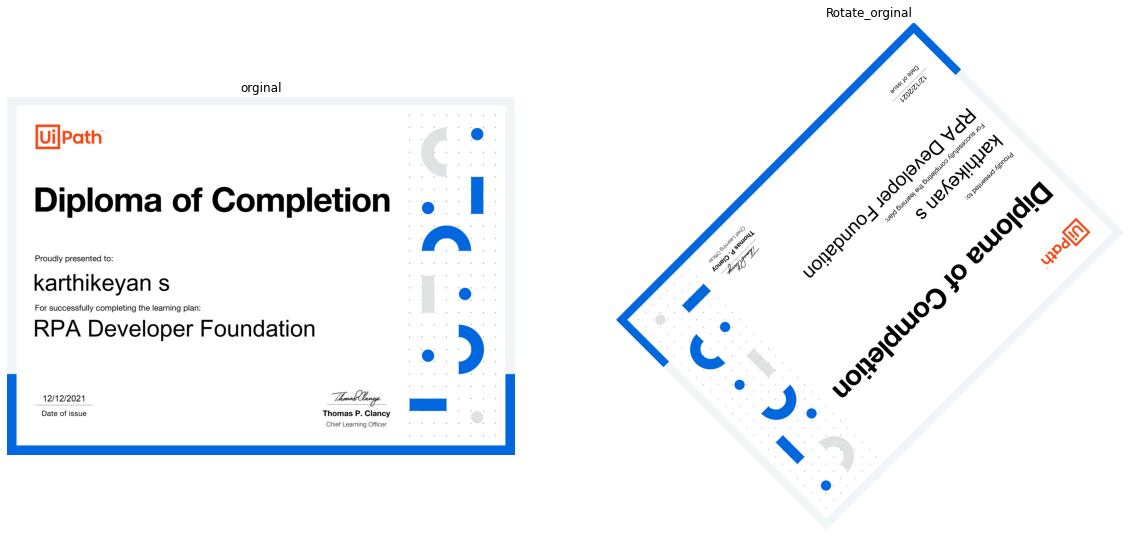

In [88]:
## Display Image
plt.figure(figsize=[20,10])
plt.subplot(121) ; plt.axis("off"); plt.imshow(img) ;plt.title("orginal")
plt.subplot(122) ; plt.axis("off"); plt.imshow(ro_img) ;plt.title("Rotate_orginal")


In [89]:
## Convert Image Into GrayScale
im1_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
im2_gray =  cv2.cvtColor(ro_img , cv2.COLOR_BGR2GRAY)


In [90]:
## Detect ORB features and compute description
Max_number = 1000
orb = cv2.ORB_create(Max_number)
keypoints1 , descriptors1 = orb.detectAndCompute(im1_gray  , None)
keypoints2 , descriptors2 = orb.detectAndCompute(im2_gray  , None)


In [91]:
## Display
im1_display = cv2.drawKeypoints(img , keypoints1 , outImage = np.array([]) , color = (255,0,0) , flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(ro_img , keypoints2 , outImage = np.array([]) , color = (255,0,0) , flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Rotate_orginal')

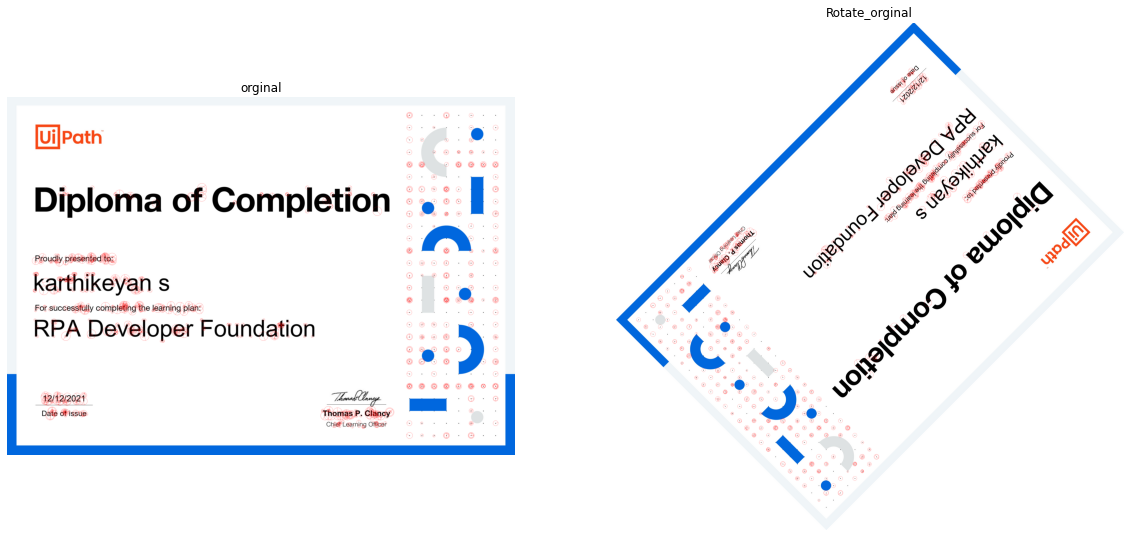

In [92]:
## Display Image
plt.figure(figsize=[20,10])
plt.subplot(121) ; plt.axis("off"); plt.imshow(im1_display) ;plt.title("orginal")
plt.subplot(122) ; plt.axis("off"); plt.imshow(im2_display) ;plt.title("Rotate_orginal")


In [93]:
## mATCH fEATURES
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1 , descriptors2 , None)

# matches.sort(key = lambda x : x.distance , reverse = False)


numGoodMatches = int(len(matches)*0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'orginal')

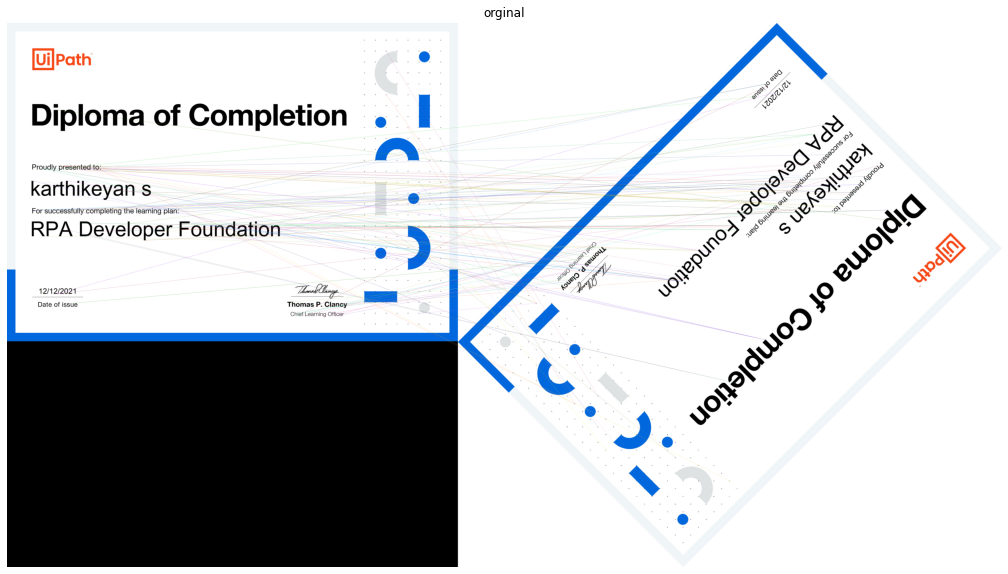

In [94]:
im_matches = cv2.drawMatches(img , keypoints1 , ro_img , keypoints2,matches  , None)

plt.figure(figsize=[20,10])
plt.axis("off"); plt.imshow(im_matches) ;plt.title("orginal")

## Find Homography

In [95]:
points1 = np.zeros((len(matches) , 2) , dtype=np.float32)
points2 = np.zeros((len(matches) , 2) , dtype=np.float32)



for i ,  match in enumerate(matches):
  points1[i , : ] = keypoints1[match.queryIdx].pt
  points2[i , : ] = keypoints2[match.trainIdx].pt


#

h , mask = cv2.findHomography(points2 , points1 , cv2.RANSAC)



In [96]:
height , width , channels = img.shape
im2_reg = cv2.warpPerspective(ro_img , h , (width , height))

Text(0.5, 1.0, 'Rotate_orginal')

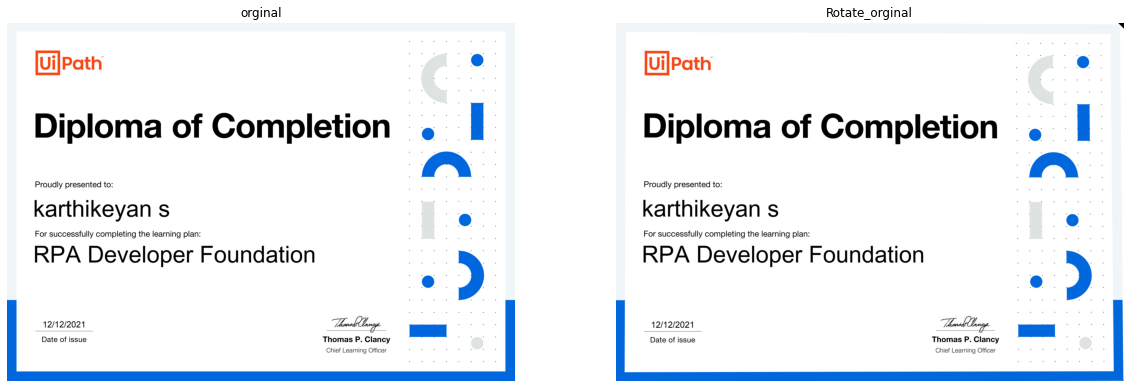

In [97]:
## Display Image
plt.figure(figsize=[20,10])
plt.subplot(121) ; plt.axis("off"); plt.imshow(img) ;plt.title("orginal")
plt.subplot(122) ; plt.axis("off"); plt.imshow(im2_reg) ;plt.title("Rotate_orginal")


In [98]:
type(im2_reg)

numpy.ndarray

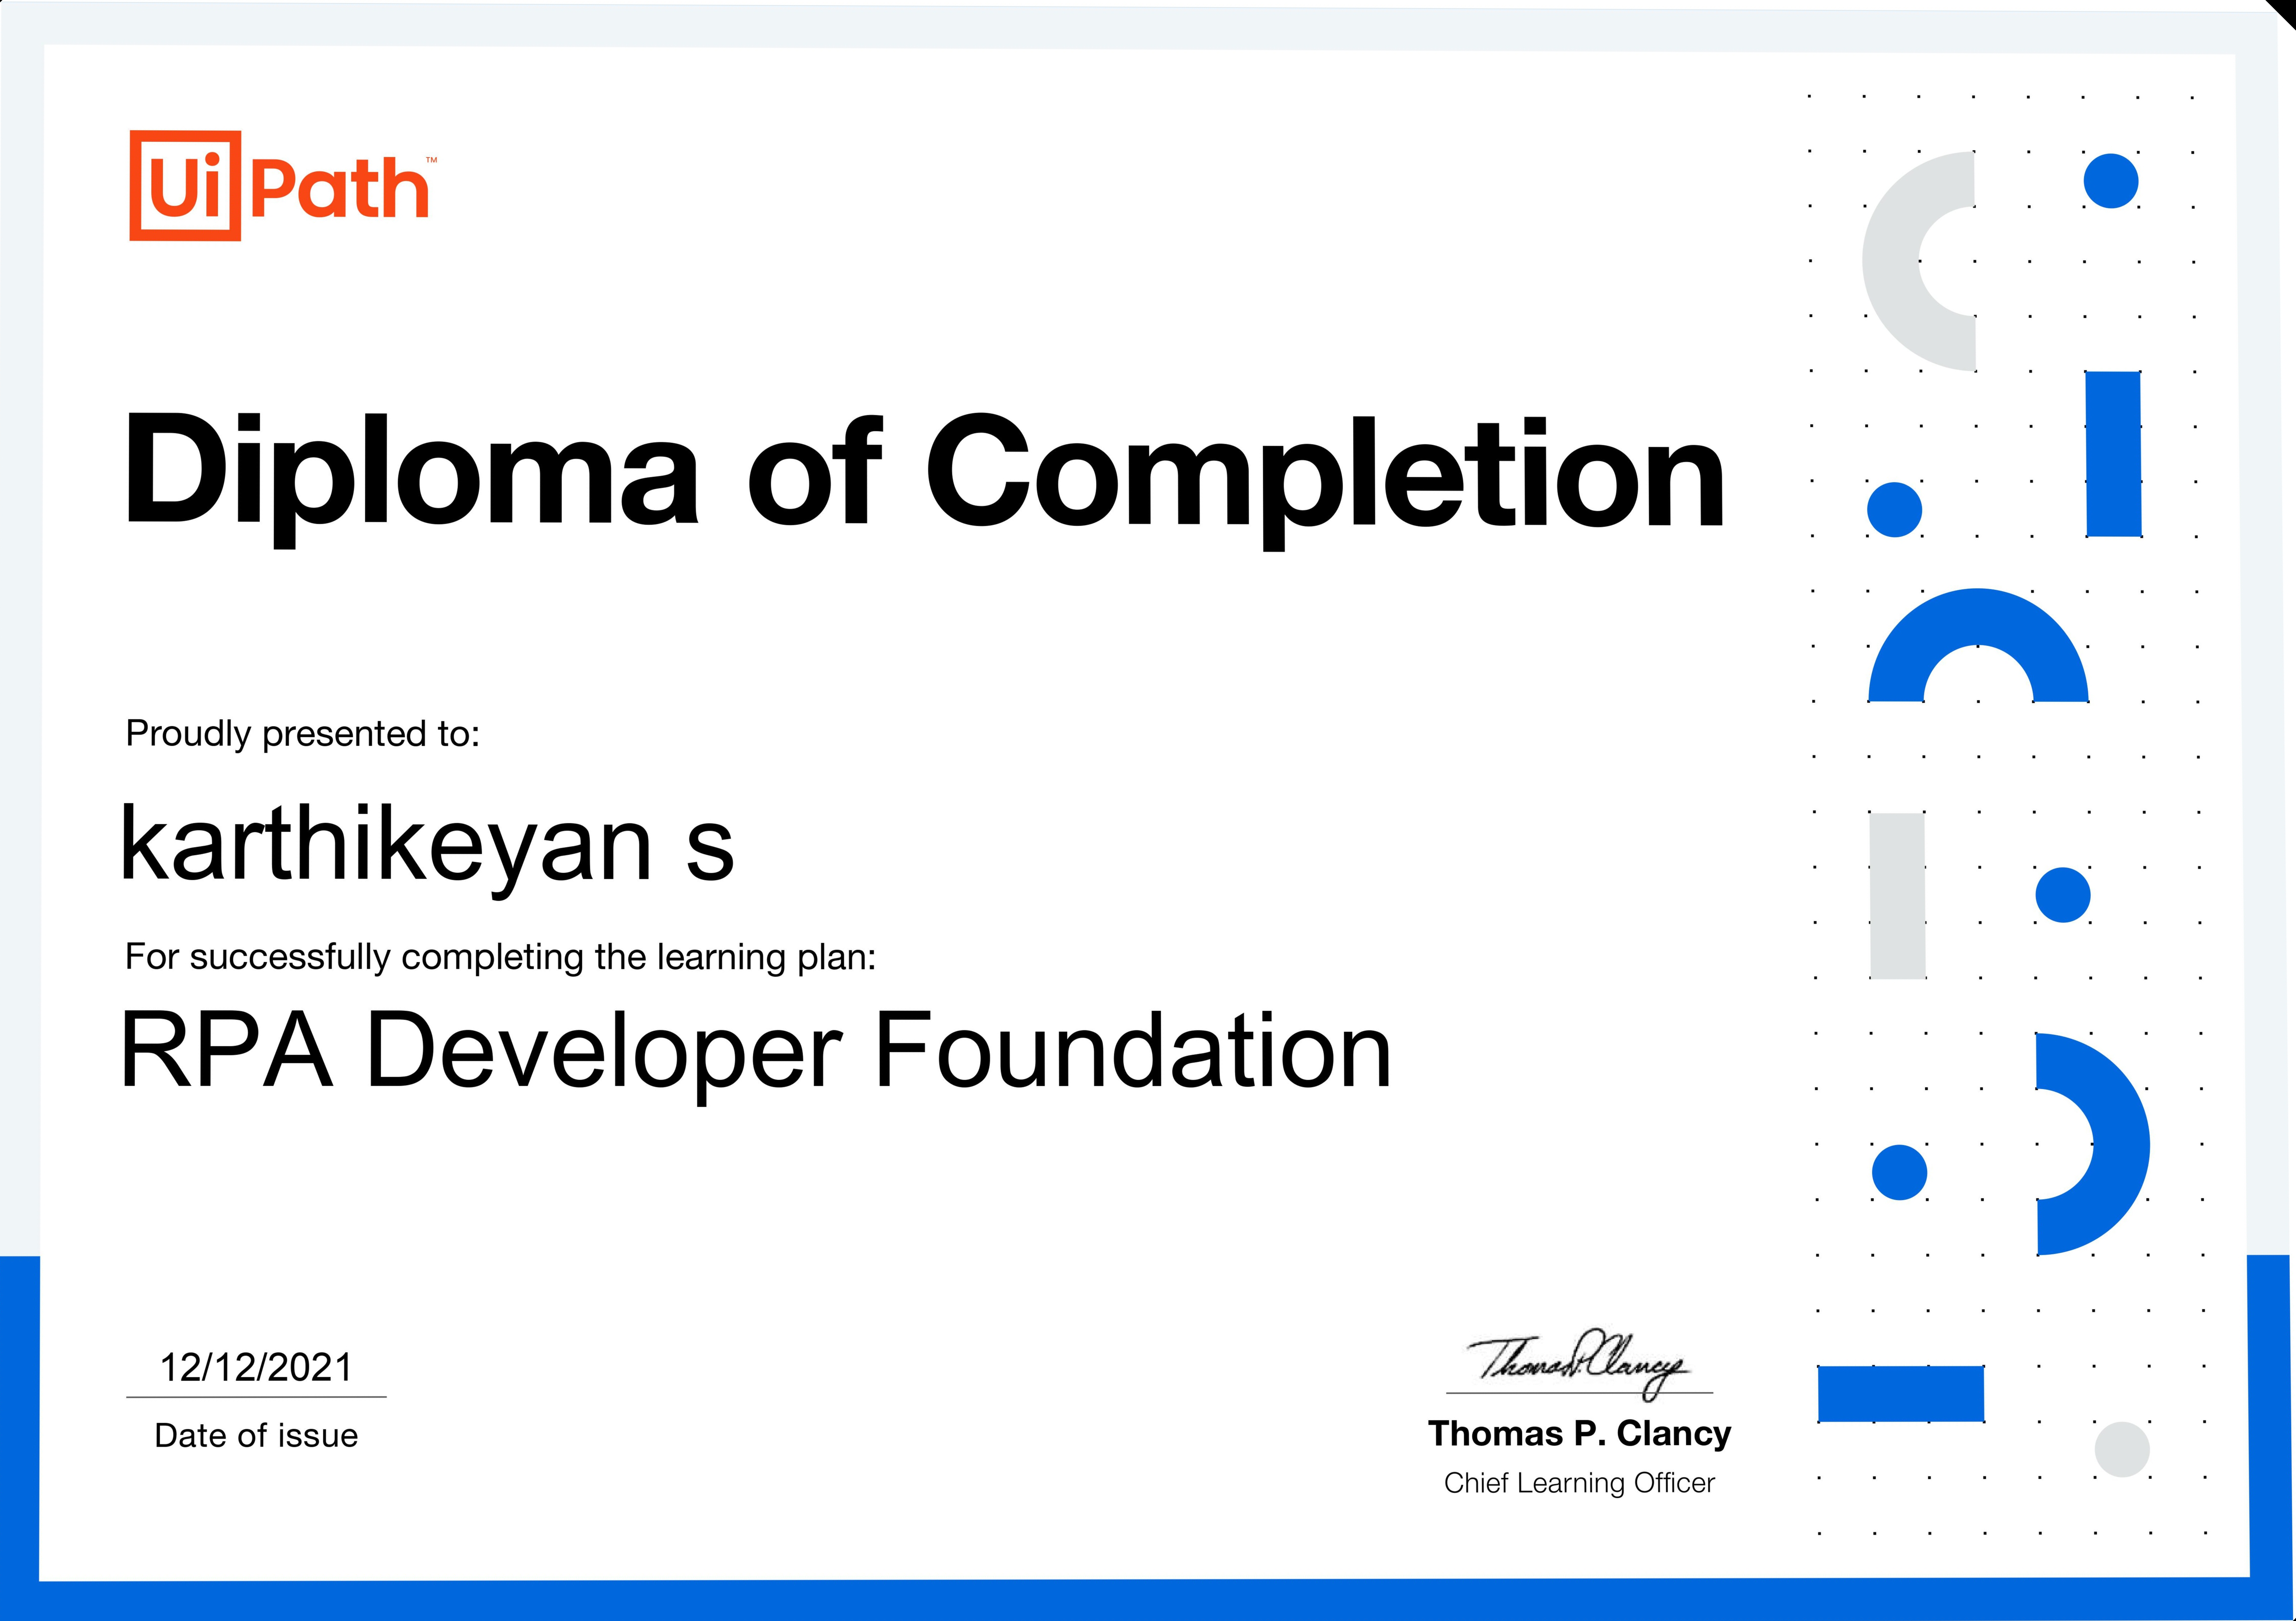

True

In [105]:
# fil_img = cv2.imread(im2_reg)
from google.colab.patches import cv2_imshow
convert = cv2.cvtColor(im2_reg , cv2.COLOR_BGR2RGB )
cv2_imshow(convert)
cv2.imwrite("Convert-Image.png" , convert)